In [1]:
# loading libraries
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score, confusion_matrix
from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.model_selection import train_test_split
import pickle

In [2]:
df = pd.read_csv('../data/final_data.csv')
df.head()

,Species,Weight,Length1,Length2,Length3,Height,Width
0,Bream,242.0,23.2,25.4,30.0,11.5200,4.0200
1,Bream,290.0,24.0,26.3,31.2,12.4800,4.3056
2,Bream,340.0,23.9,26.5,31.1,12.3778,4.6961
3,Bream,363.0,26.3,29.0,33.5,12.7300,4.4555
4,Bream,430.0,26.5,29.0,34.0,12.4440,5.1340


In [3]:
# independent variables
x = df.drop('Species',axis=1)
print(x.shape)
x.head()

(159, 6)


,Weight,Length1,Length2,Length3,Height,Width
0,242.0,23.2,25.4,30.0,11.5200,4.0200
1,290.0,24.0,26.3,31.2,12.4800,4.3056
2,340.0,23.9,26.5,31.1,12.3778,4.6961
3,363.0,26.3,29.0,33.5,12.7300,4.4555
4,430.0,26.5,29.0,34.0,12.4440,5.1340


In [4]:
# dependent variables
y = df['Species']
print(y.shape)
y.head()

(159,)


0    Bream
1    Bream
2    Bream
3    Bream
4    Bream
Name: Species, dtype: object

## Splitting Data

In [5]:
#Splitting Data
X_train, X_test, y_train, y_test = train_test_split(x,y, test_size=.25, random_state=42)
X_train.shape, X_test.shape, y_train.shape, y_test.shape

((119, 6), (40, 6), (119,), (40,))

In [6]:
encoder = LabelEncoder()
y = encoder.fit_transform(y)
y_map = {index:label for index,label in enumerate(encoder.classes_)}
y_map

{0: 'Bream',
 1: 'Parkki',
 2: 'Perch',
 3: 'Pike',
 4: 'Roach',
 5: 'Smelt',
 6: 'Whitefish'}

In [7]:
y

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 4, 4, 4, 4, 4, 4, 4, 4, 4,
       4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 6, 6, 6, 6, 6, 6, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 3, 3, 3, 3,
       3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 5, 5, 5, 5, 5, 5, 5, 5, 5,
       5, 5, 5, 5, 5])

In [8]:
scaler = StandardScaler()
X = scaler.fit_transform(x)

In [9]:
X_train, X_test, y_train, y_test = train_test_split(X,y, test_size=.25, random_state=42)

## Logistic Regression & RandomForestClassifier

In [10]:
log_model = LogisticRegression()
log_model.fit(X_train,y_train)

LogisticRegression()

In [11]:
log_model.score(X_test,y_test)

0.85

85% Accuracy using logistic regression

In [12]:
model = RandomForestClassifier(random_state=42).fit(X_train, y_train)
y_pred_rfc = model.predict(X_test)
model.score(X_test, y_test)

0.8

# Metrics

80% accuracy using Random Forest Classifier

In [13]:
y_pred_log = log_model.predict(X_test)
matrix = confusion_matrix(y_test, y_pred_log)
matrix


array([[11,  0,  0,  0,  0,  0,  0],
       [ 0,  2,  0,  0,  0,  0,  0],
       [ 0,  0, 12,  0,  0,  0,  0],
       [ 0,  0,  0,  4,  0,  0,  0],
       [ 0,  0,  3,  0,  0,  0,  0],
       [ 0,  0,  0,  0,  0,  5,  0],
       [ 0,  0,  3,  0,  0,  0,  0]], dtype=int64)

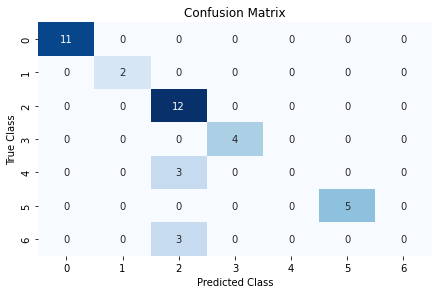

{0: 'Bream', 1: 'Parkki', 2: 'Perch', 3: 'Pike', 4: 'Roach', 5: 'Smelt', 6: 'Whitefish'}


In [14]:
sns.heatmap(matrix, annot=True, cbar=None, cmap='Blues')
plt.title('Confusion Matrix'), plt.tight_layout()
plt.ylabel('True Class'), plt.xlabel('Predicted Class')
plt.show()
print(y_map)

## Saving the model

In [15]:
with open('..\models\model.pkl', 'wb') as final_model:
    pickle.dump(model, final_model)